In [82]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


import time

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X.shape


(442, 10)

In [4]:
y.shape

(442,)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

print(x_train.shape)
print(y_train.shape)

(353, 10)
(353,)


In [51]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [52]:
y_predict = reg.predict(x_test)
print(f"r2 : {r2_score(y_test, y_predict)}")

r2 : 0.452606602161738


In [53]:
print(reg.intercept_)
print(reg.coef_)

151.3456553477407
[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]


In [77]:

class SGD_regresssor:
    def __init__(self, learning_rate = .01, epochs = 45):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef = None
        self.intercept = None

    def fit(self,x_train, y_train):
        self.intercept = 0
        self.coef = np.ones(x_train.shape[1])

        for i in range(self.epochs):
            for i in range(x_train.shape[0]):
                idx = np.random.randint(0, x_train.shape[0])

                y_hat = np.dot(self.coef, x_train[idx]) + self.intercept

                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept = self.intercept - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat), x_train[idx])
                self.coef = self.coef - (self.lr * coef_der)
                
                
        print(self.intercept)
        print(self.coef)
                
    def predict(self, x_test):
        return np.dot(x_test, self.coef) + self.intercept

In [78]:
sgd = SGD_regresssor()

In [84]:
start = time.time()
sgd.fit(x_train, y_train)
print(f"time needed to fit : {time.time() - start}")

154.0987124931982
[  51.19964795  -91.29207315  335.71359711  244.78398218    6.43796081
  -31.1599225  -172.3853675   148.3769396   279.8219865   149.09185048]
time needed to fit : 0.20294570922851562


In [80]:
y_predict = sgd.predict(x_test)
y_predict

array([163.40011367, 168.95617501, 160.21124492, 273.50204961,
       147.24889194, 125.69914025, 236.99118424, 204.53092571,
       109.64724895, 135.69105249, 113.25310617, 144.77889925,
        76.25353848, 213.35382191, 124.94354297, 140.05256441,
       222.34446571, 241.82104618, 177.00984324, 211.38881907,
       183.24494316, 110.34730316,  94.1058555 , 191.49380252,
       149.1857499 , 170.65973627, 184.61366075, 178.3240777 ,
        68.41595119, 141.66068497, 178.01225161, 109.28624152,
       145.98829527, 186.92982303, 180.00095272, 191.31949693,
       143.52449845, 147.20196039, 174.1960884 ,  80.02072553,
       103.49336106, 130.16371881, 158.024727  , 172.82659326,
       173.11955296,  85.27201644,  95.28037693, 109.44312973,
        79.34757392, 148.54044719, 139.37898572,  80.49931733,
       136.93591455, 120.67190525, 186.71511379, 145.25043522,
       119.28434611, 192.25464706, 119.58651902,  79.53994067,
       189.08309489, 179.99247418, 141.32429374, 133.18

In [81]:
print(r2_score(y_test, y_predict))

0.4418436879695802


In [110]:
class SGD:
    def __init__(self, learning_rate = .01, epochs = 45):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None
        
        
    def fit(self, x_train, y_train):
        self.coef_ = np.ones(x_train.shape[1])
        self.intercept_ = 0
        
        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                idx = np.random.randint(0, x_train.shape[0])
                
                y_hat = self.intercept_ + np.dot(self.coef_, x_train[idx])
                
                der_intercept = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * der_intercept)
                
                der_coef = -2 * (y_train[idx] - y_hat)* x_train[idx]
                self.coef_ = self.coef_ - (self.lr * der_coef)
                
        print(self.intercept_)
        print(self.coef_)

In [111]:
sd = SGD()

In [112]:
sd.fit(x_train, y_train)

159.13006838598673
[  54.0792945   -79.93789588  345.69353152  232.24010179   -0.73992769
  -36.84998027 -174.48458962  145.36593667  274.96237661  145.87855261]


In [140]:
class SGD:
    def __init__(self, learning_rate = .01, epochs = 45):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None
        self.slops = []
        
        
    def fit(self, x_train, y_train):
        self.coef_ = np.ones(x_train.shape[1])
        self.intercept_ = 0
        
        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                idx = np.random.randint(0, x_train.shape[0])
                
                y_hat = self.intercept_ + np.dot(self.coef_, x_train[idx])
                
                der_intercept = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * der_intercept)
                
                der_coef = -2 * np.dot((y_train[idx] - y_hat),x_train[idx])
                self.coef_ = self.coef_ - (self.lr * der_coef)
            self.slops.append(self.coef_)
        print(y_hat)
        print(der_coef)
        print(self.coef_)
        

In [141]:
sd = SGD()

In [142]:
sd.fit(x_train, y_train)

155.31291938488388
[ 0.43855939 -0.83148792 -0.67769541  0.00125738  0.02203336  0.646283
 -0.80837715  0.63903127 -0.61928655  1.13718021]
[  69.67590153  -92.10824107  342.01560508  234.76240679   10.7997521
  -21.62347791 -177.72522582  147.16825017  275.2051411   144.00222846]


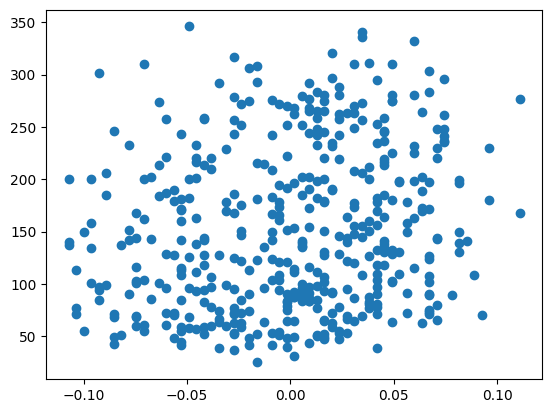

In [148]:
plt.scatter(X[:,0], y)

In [149]:
x_col1 = X[:,0]

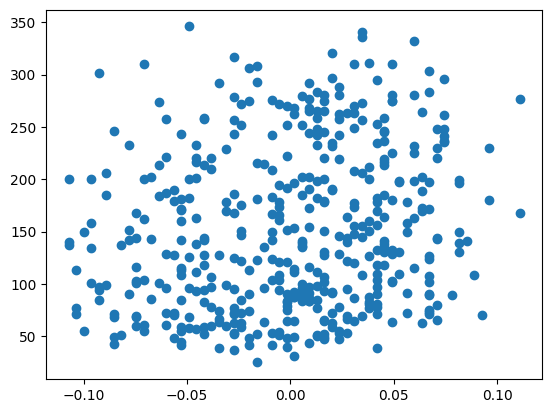

In [166]:
plt.scatter(x_col1, y)

In [161]:
m = -200
b = 150
all_b = []
all_m = []
all_cost =[]
all_lr = []

epoch = 1

t0, t1 = 5 , 50

def learning_rate(t):
    return t0 /( t + t1)

for i in range(epoch):
    for j in range(x_col1.shape[0]):
        
        lr = learning_rate(i * x_col1.shape[0] + j)
        idx = np.random.randint(0, x_col1.shape[0])
        
        y_hat = m * x_col1[idx] + b
        
        der_b = -2 * (y[idx] - y_hat) 
        b = b - (lr * der_b)
        
        der_m = -2 * (y[idx] - y_hat) * x_col1[idx]
        m = m - (lr * der_m)
        
        cost = (y[idx] - y_hat) **2
        
        all_b.append(b)
        all_m.append(m)
        all_cost.append(cost)
        all_lr.append(lr)
        
print(b)
print(m)

len(all_cost)

158.58352094099246
-175.6406190869333


442

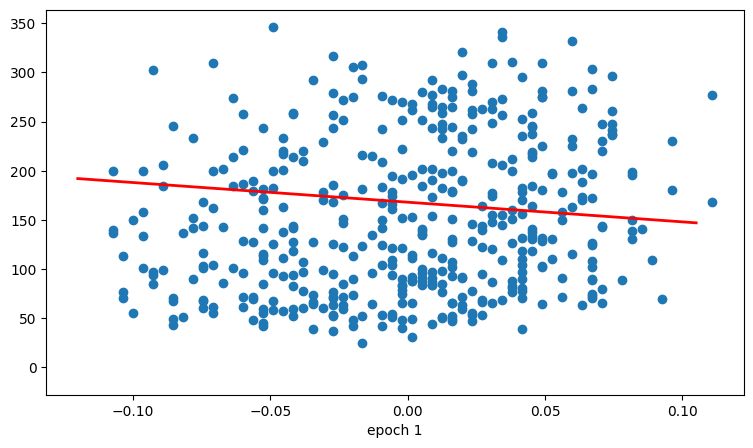

In [182]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-.12, .120, 0.015)
# y_i = x_i*(-27) -250
ax.scatter(x_col1, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, frames=100, interval=5)

f = r"stochastic_animation_line_plot.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [191]:
m_arr = np.linspace(-150, 150, 10)
b_arr = np.linspace(-150, 150, 10)
mGrid, bGrid = np.meshgrid(m_arr,b_arr)

final = np.vstack((mGrid.ravel().reshape(1,100),bGrid.ravel().reshape(1,100))).T

z_arr = []

for i in range(final.shape[0]):
    z_arr.append(np.sum((y - final[i,0]*x_col1.reshape(442) - final[i,1])**2))

z_arr = np.array(z_arr).reshape(10,10)

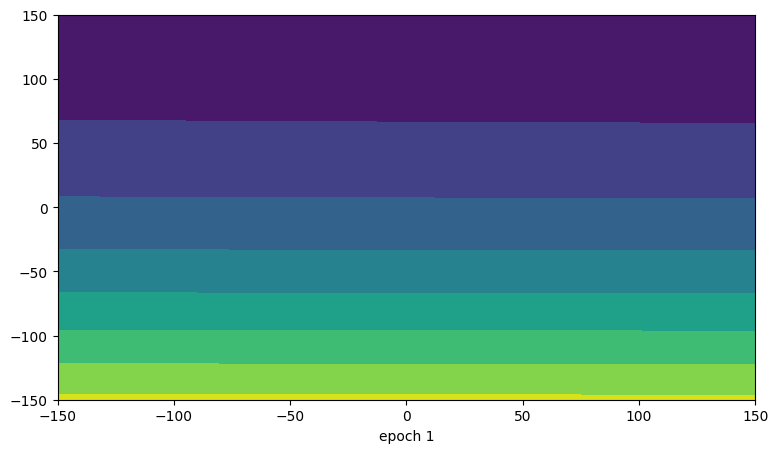

In [192]:
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(-150, 150), ylim =(-150, 150)) 

axis.contourf(m_arr, b_arr, z_arr)

line, = axis.plot([], [], lw = 2,color='white') 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(all_m[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 100,repeat=False, interval = 100)